# Pandas 3
### Samuel Goldrup
### Math 403
### 20 September 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    df = pd.read_csv("college.csv").groupby("Private") 
    pri,pub = df.get_group("Yes"), df.get_group("No") #separate dataframes for private and public schools
    arr_pairs = [[pri["S.F.Ratio"],pub['S.F.Ratio']],[pri['Top10perc'],pub['Top10perc']],[pri['Top25perc'],pub['Top25perc']]] #comparing the arrays for public and private schools
    #indices of the arrays with the larger average
    indices = [np.argmax([pri["S.F.Ratio"].mean(),pub['S.F.Ratio'].mean()]),np.argmax([pri['Top10perc'].mean(),pub['Top10perc'].mean()]),np.argmax([pri['Top25perc'].mean(),pub['Top25perc'].mean()])]
    arrs = [arr_pair[index] for arr_pair,index in zip(arr_pairs,indices)]
    ans_1,ans_2,ans_3 = arrs[0].describe(),arrs[1].describe(),arrs[2].describe()
    return ans_1.to_numpy(),ans_2.to_numpy(),ans_3.to_numpy()
    

In [3]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv("college.csv")
    private = df.groupby("Private")
    private[["Apps", "Accept","Enroll"]].mean().plot(kind="barh",title="Comparing Applications, Acceptances and Enrollment")
    #df.boxplot(["Apps", "Accept","Enroll"], by="Private", grid=False)
    #plt.tight_layout()
    
    df.boxplot(["Room.Board"], by="Private", grid=False)
    plt.title("Room and Board")
    plt.tight_layout() #beautify output
    plt.show()

<IPython.core.display.Javascript object>


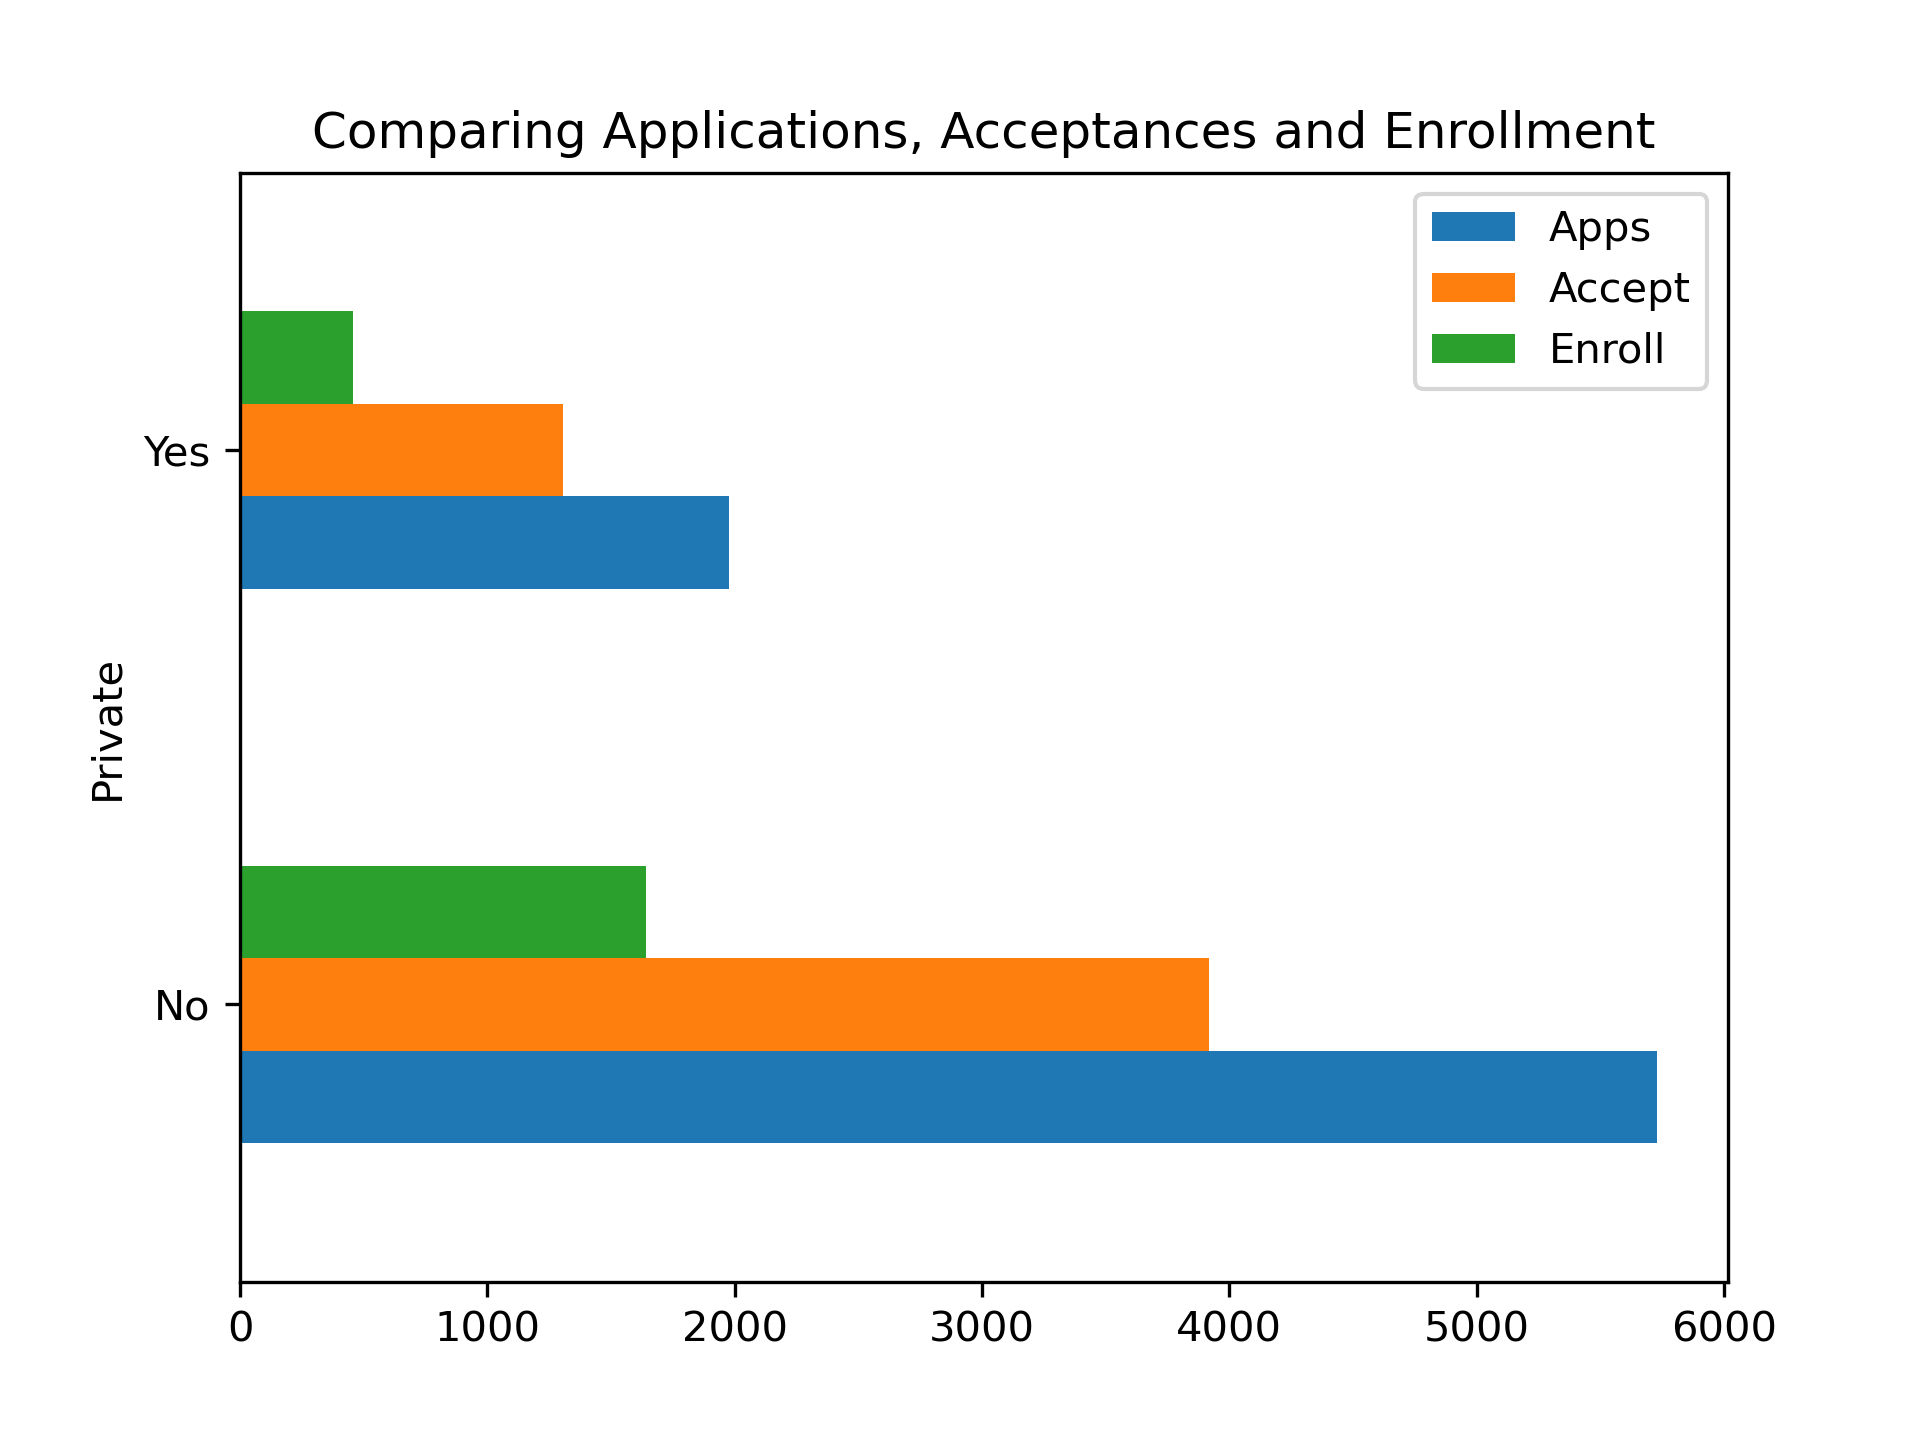

<IPython.core.display.Javascript object>


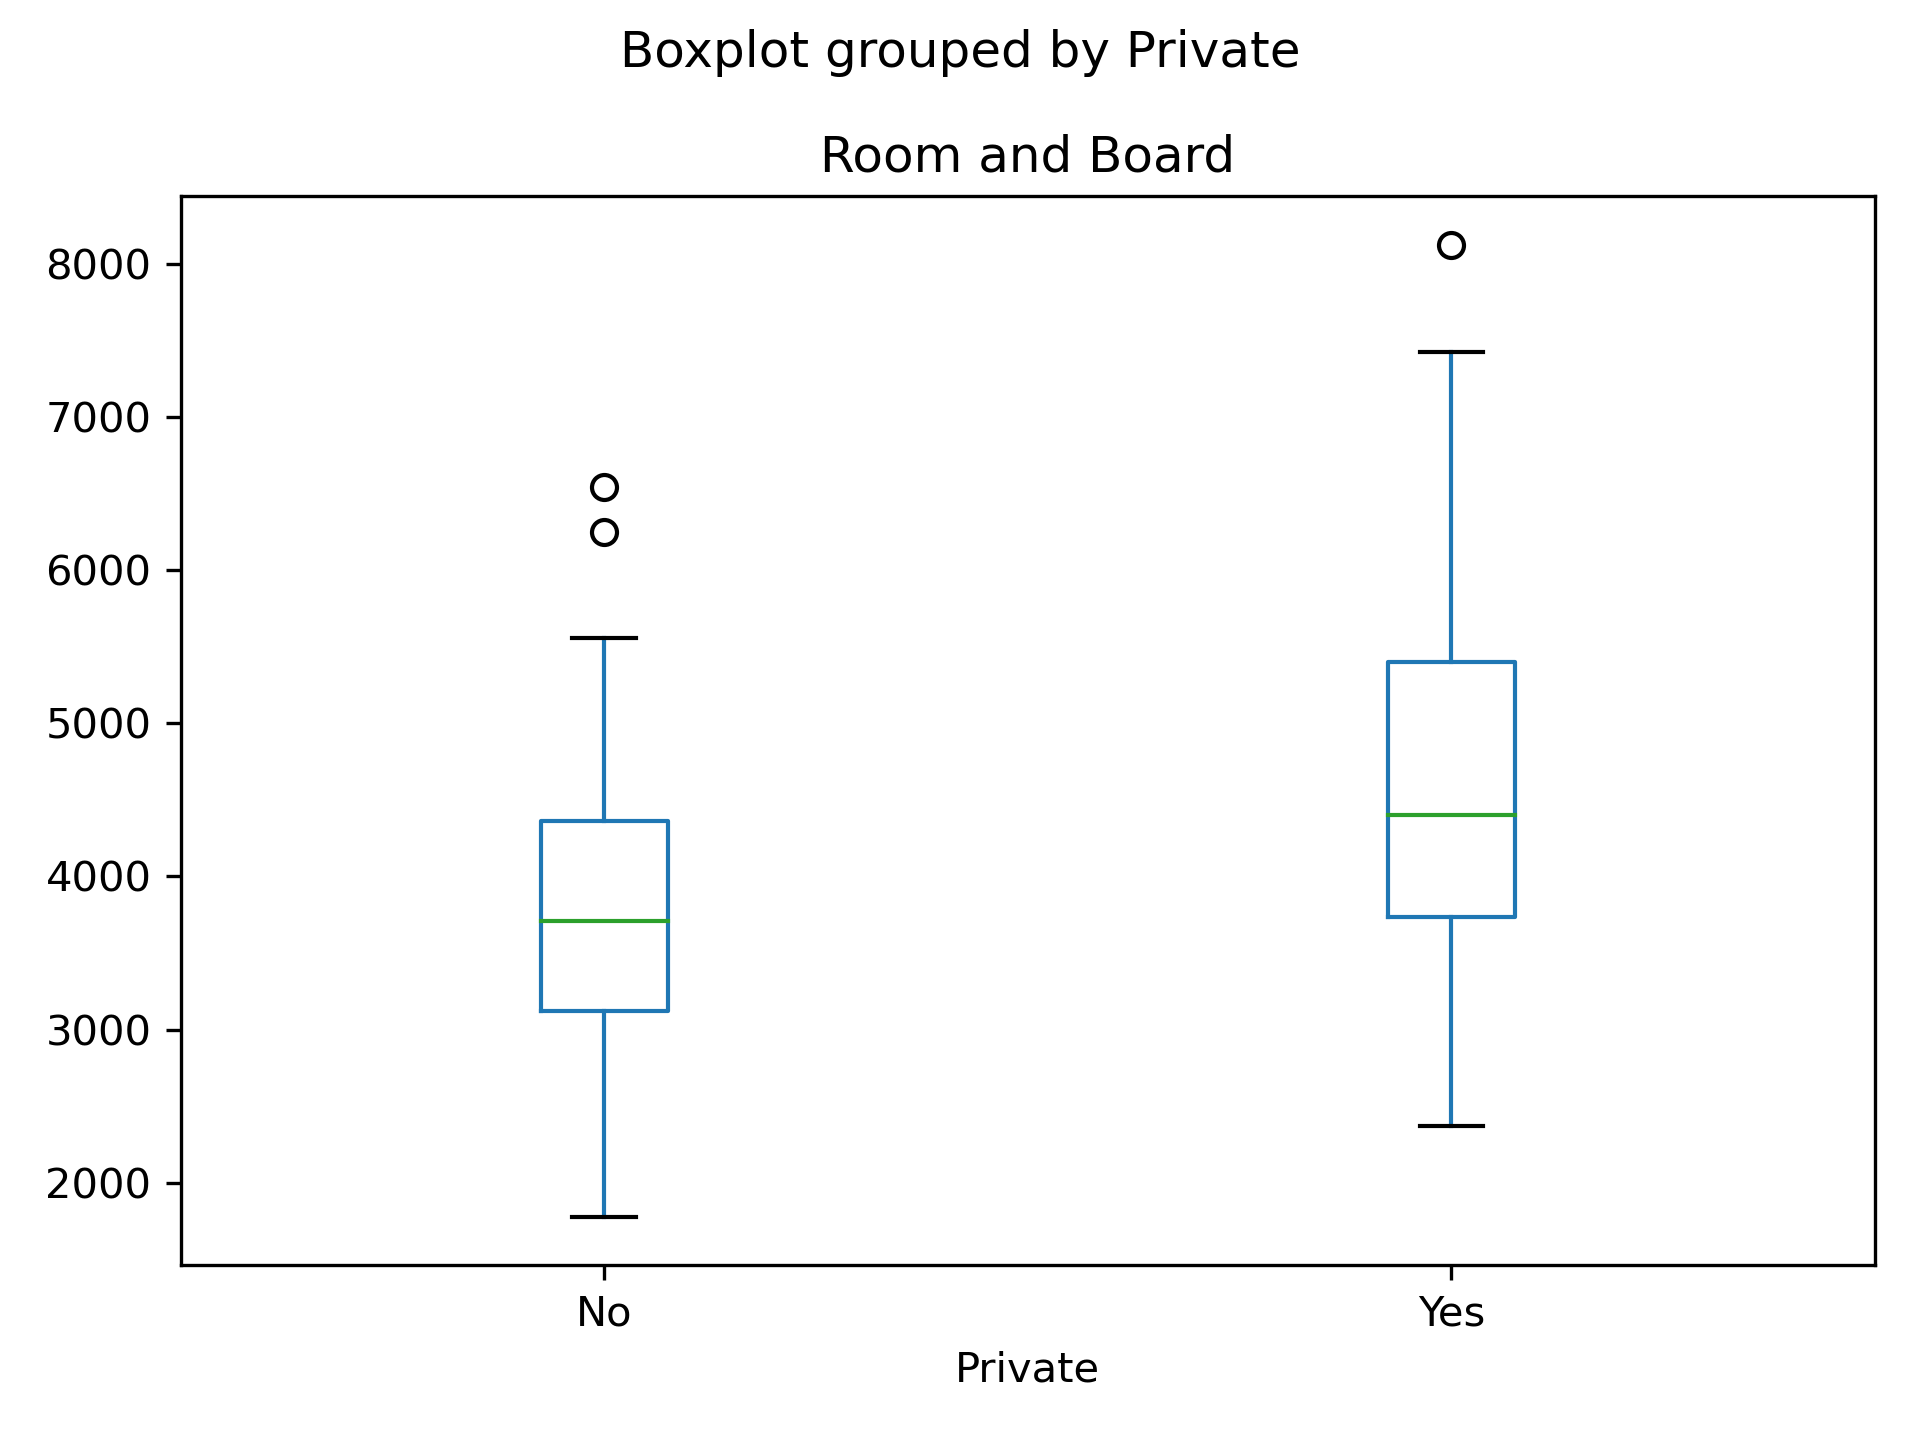

In [5]:
prob2()

# Problem 3

In [6]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = pd.read_csv("Ohio_1999.csv")
    a = df.pivot_table(values=["Usual Weekly Earnings"],index=["Race", "Sex"],aggfunc="sum") #total
    b = df.pivot_table(values=["Usual Hours Worked"],index=["Race", "Sex"],aggfunc="count") #cumulative
    c = df.pivot_table(values=["Usual Hours Worked"],index=["Race", "Sex"],aggfunc="mean") #average
    
    return tuple(list(a.stack().idxmax())[:2]),tuple(list(b.stack().idxmin())[:2]),tuple(list(c.stack().idxmax())[:2])

In [7]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [8]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv("Ohio_1999.csv")
    attainment = pd.cut(df['Educational Attainment'], [0, 38, 42, 47]) #ed attainment bins
    age_ranges = pd.qcut(df["Age"],6) #6 quantiles
    counts = attainment.value_counts() #frequency
    b = df.pivot_table(values=["Usual Hours Worked"],index=[age_ranges],aggfunc="mean") 
    c = df.pivot_table(values="Yearly Salary",index=[age_ranges,attainment],aggfunc="mean")
    return counts.idxmax(), b.idxmax(), c.idxmin()

In [9]:
prob4()

(Interval(38, 42, closed='right'),
 Usual Hours Worked    (40.0, 46.0]
 dtype: interval,
 Yearly Salary    ((15.999, 29.0], (0, 38])
 dtype: object)

# Problem 5

In [10]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    #question 1
    df = pd.read_csv("college.csv")
    df['Acc Rate'] = df['Accept'] / df['Apps']
    pri,pub = df.groupby("Private").get_group("Yes"), df.groupby("Private").get_group("No")
    corr_pri1, corr_pub1 = pri[["Expend","perc.alumni"]].corr(),pub[["Expend","perc.alumni"]].corr() #correlation matrix
    ans_1 = False
    
    #question 2
    pri_grads,pub_grads = pd.cut(pri['Grad.Rate'],[0,20,40,60,80,100]).value_counts(),pd.cut(pub['Grad.Rate'],[0,20,40,60,80,100]).value_counts()
    ans_2 = pri_grads.idxmax() == pub_grads.idxmax()
    
    #question 3
    corr_pri2, corr_pub2 = pri[["Acc Rate","Top10perc"]].corr(),pub[["Acc Rate","Top10perc"]].corr()
    ans_3 = True
    
    acc_rate_ranges = pd.qcut(df['Acc Rate'],5)
    
    #question 4
    d = df.pivot_table(values="Top10perc",index=["Private",acc_rate_ranges])
    print(d)
    return ans_1,ans_2,ans_3, "More selective private schools can pick the higher performing students. Pivot table above corroborates with this statement."

In [11]:
prob5()

                        Top10perc
Private Acc Rate                 
No      (0.153, 0.642]  29.714286
        (0.642, 0.743]  23.142857
        (0.743, 0.808]  20.897436
        (0.808, 0.865]  18.187500
        (0.865, 1.0]    17.944444
Yes     (0.153, 0.642]  47.470000
        (0.642, 0.743]  28.283019
        (0.743, 0.808]  24.517241
        (0.808, 0.865]  25.585366
        (0.865, 1.0]    23.633333


(False,
 False,
 True,
 'More selective private schools can pick the higher performing students. Pivot table above corroborates with this statement.')